In [113]:
# Import deficiencies
import pandas as pd
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [114]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [115]:
# Twitter API Keys
consumer_key = "fkxBgq9L4nHMvZOh8sJgWhPxI"
consumer_secret = "4vbR5Pc69sHkD2rRt4BySnKoknx2YfAr3U3RRKnPhqatISZi8D"
access_token = "2697326256-8rbvcf2wW0JSdcuS3cyZf6DO8odMbnW5geqytCS"
access_token_secret = "UEpJXymFPkKZmoanJRVMURa4DodWzaDgZpWY2bLAmIKTd"


In [116]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [117]:
# Target news sites for sentiment analysis
news_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# Array to hold setiment
sentiments = []

In [118]:
# Loop through all target users
for target_news in news_list:
    
    # Counter
    counter = 1
    

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_news,count=100, result_type="recent")

    # Format news org name for df later
    news_org = target_news.replace("@", "")

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
#             print("Tweet %s: %s" % (counter, tweet["text"]))
#             print("Tweet %s: %s" % (counter, tweet["created_at"]))
#             print()

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        sentiments.append({"News Org": tweet["user"]["name"],
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Tweets Ago": counter})

        # Add to counter 
        counter = counter + 1
    

In [119]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,News Org,Tweets Ago
0,0.0000,Wed Mar 07 19:12:02 +0000 2018,BBC,1
1,0.0000,Wed Mar 07 18:23:04 +0000 2018,BBC,2
2,0.4987,Wed Mar 07 17:42:01 +0000 2018,BBC,3
3,0.0000,Wed Mar 07 17:27:29 +0000 2018,BBC,4
4,0.0000,Wed Mar 07 17:22:51 +0000 2018,BBC,5


In [120]:
# Create seperate dataframes for each news org for graphing
sentiments_BBC = sentiments_pd[sentiments_pd["News Org"] == "BBC"]

sentiments_CBS = sentiments_pd[sentiments_pd["News Org"] == "CBS"]
sentiments_CNN = sentiments_pd[sentiments_pd["News Org"] == "CNN"]
sentiments_Fox = sentiments_pd[sentiments_pd["News Org"] == "Fox News"]
sentiments_NYT = sentiments_pd[sentiments_pd["News Org"] == "The New York Times"]


In [121]:
sentiments_BBC

,Compound,Date,News Org,Tweets Ago
0,0.0000,Wed Mar 07 19:12:02 +0000 2018,BBC,1
1,0.0000,Wed Mar 07 18:23:04 +0000 2018,BBC,2
2,0.4987,Wed Mar 07 17:42:01 +0000 2018,BBC,3
3,0.0000,Wed Mar 07 17:27:29 +0000 2018,BBC,4
4,0.0000,Wed Mar 07 17:22:51 +0000 2018,BBC,5
5,0.8555,Wed Mar 07 17:22:23 +0000 2018,BBC,6
6,0.0000,Wed Mar 07 17:16:45 +0000 2018,BBC,7
7,0.5562,Wed Mar 07 17:14:49 +0000 2018,BBC,8
8,0.0000,Wed Mar 07 17:13:49 +0000 2018,BBC,9
9,0.0000,Wed Mar 07 16:15:06 +0000 2018,BBC,10


In [122]:
desc = sentiments_pd.sort_values("Tweets Ago", ascending = False)
desc.head()

,Compound,Date,News Org,Tweets Ago
499,-0.8714,Wed Mar 07 10:16:06 +0000 2018,The New York Times,100
399,0.0000,Wed Mar 07 18:27:48 +0000 2018,Fox News,100
99,0.0000,Sat Mar 03 15:26:56 +0000 2018,BBC,100
299,0.0000,Wed Mar 07 18:50:08 +0000 2018,CNN,100
199,0.1531,Mon Jan 29 15:00:03 +0000 2018,CBS,100


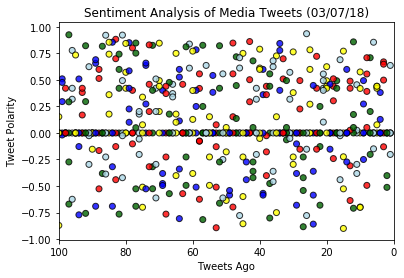

In [128]:
# Create plot
## MAYBE Create 5 diff df's and plot each on the same scatter plot?

color_map = {"BBC": "lightblue", "CBS": "darkgreen", "CNN": "red", "Fox News": "blue", "The New York Times": "yellow"}

# plt.scatter(sentiments_BBC["Tweets Ago"],
#          sentiments_BBC["Compound"],
#          color = "lightblue",
#          edgecolor = "black",
#          alpha=0.5)

# plt.scatter(sentiments_CBS["Tweets Ago"],
#          sentiments_CBS["Compound"],
#          color = "darkgreen",
#          edgecolor = "black",
#          alpha=0.5)


# Scatter plot without the df's splitting
plt.scatter(sentiments_pd["Tweets Ago"],
         sentiments_pd["Compound"],
         color = [color_map[x] for x in consolidated_sentiments_df["News Org"]],
         edgecolor = "black",
         alpha=0.8)

plt.xlim(100,0)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [124]:
# Create new df that consolidates the compound sentiments for each news org
consolidated_sentiments_df = pd.DataFrame(sentiments_pd.groupby(["News Org"]).mean()["Compound"])
consolidated_sentiments_df = consolidated_sentiments_df.reset_index()
consolidated_sentiments_df

,News Org,Compound
0,BBC,0.180591
1,CBS,0.325298
2,CNN,-0.045923
3,Fox News,-0.057488
4,The New York Times,0.027484


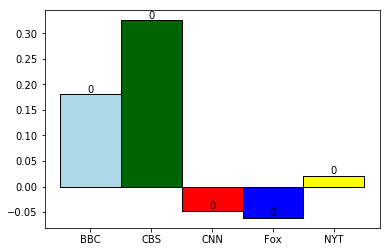

In [105]:
# Create consolidated bar chart
## NEED to make the sentiment #s show up next to each bar
x_axis = np.arange(len(consolidated_sentiments_df["News Org"]))

plt.bar(x_axis, consolidated_sentiments_df["Compound"], 
          color=[color_map[x] for x in consolidated_sentiments_df["News Org"]], 
          edgecolor = "black", 
          width = 1)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [i for i in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])

# Add annotations for value of each bar
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

# for i, x in enumerate(consolidated_sentiments_df["Compound"]):
#     ax.text(0, i + .5, x, ha='right', fontsize='large')

plt.show()